In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('../data/2-regression/kaggle/train.csv', index_col='Id')
test = pd.read_csv('../data/2-regression/kaggle/test.csv', index_col='Id')

X = train.drop('SalePrice', axis=1).copy()
y = train['SalePrice'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 368 to 1051
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    966 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          73 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

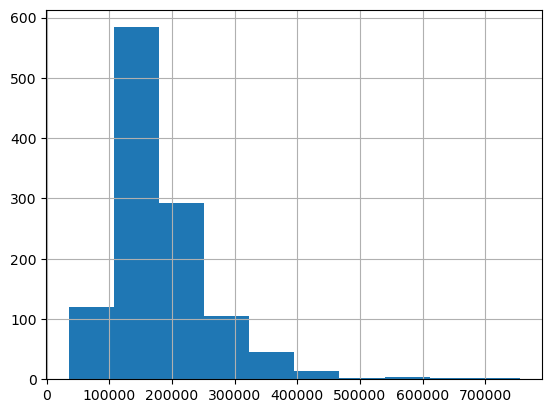

In [ ]:
y_train.hist();

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

nums = X_train.select_dtypes(include='number').columns
cats = X_train.select_dtypes(exclude='number').columns

num_pipe = make_pipeline(SimpleImputer(),
                         StandardScaler()
                        )
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='N_A'),
                         OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False)
                        )

preprocessor = make_column_transformer(
    (num_pipe, nums),
    (cat_pipe, cats)
)

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bs...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [ ]:
(preprocessor.fit_transform(X_train).isna()).sum().sum()

0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr = make_pipeline(preprocessor,
                   LinearRegression()
                  )

cv_scores = cross_validate(lr, X_train, y_train,
                           scoring='neg_root_mean_squared_log_error',
                           n_jobs=-2,
                           return_estimator=True,
                           # error_score='raise'
                          )

In [ ]:
for e in cv_scores['estimator']:
    p = e.predict(X_train)
    print(p.min())

-1613072356305320.0
-2343491467513444.0
-2422016084966784.0
-1189529568489941.5
-8176415327528.5


In [ ]:
cv_scores['estimator'][0][-1].coef_

array([-1.23733602e+02,  3.31188907e+02,  9.65408920e+03,  9.11073771e+03,
        6.21734470e+03,  1.05571529e+04,  2.03031801e+03,  4.72166368e+03,
        1.01374338e+04,  2.24093339e+03, -2.83141710e+01,  1.14960383e+04,
        5.45173881e+03,  1.63249430e+04,  5.93261793e+02,  1.76834819e+04,
       -1.80126770e+02,  1.05224900e+03,  2.24237508e+03,  1.30670387e+01,
       -6.29717286e+03, -1.53192259e+03,  2.33201567e+03,  3.79799563e+03,
       -1.79397598e+03,  4.43584839e+03,  1.63936788e+03,  2.08481404e+03,
        1.54287263e+03,  7.49076376e+02,  8.67299248e+02,  6.97889763e+02,
        1.23909038e+04,  2.34081634e+02, -1.95517184e+03, -1.42847144e+03,
       -9.41458118e+03,  2.24616503e+03,  2.06979628e+03,  3.49940123e+03,
        1.59921865e+03, -1.34712891e+04,  1.34712891e+04,  4.41429082e+03,
        6.36991255e+02, -5.05128208e+03, -1.59850069e+03,  6.53610802e+02,
        2.38096388e+03, -1.43607399e+03,  4.02976054e+03,  1.57036304e+03,
       -7.90784013e+03,  

In [ ]:
cv_scores['test_score']

array([nan, nan, nan, nan, nan])

In [ ]:
lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2nd...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
lr.score(X_train, y_train)

0.9331879417782661

In [ ]:
pred = lr.predict(test)

pd.DataFrame(pred, index=test.index, columns=['SalePrice']).to_csv('../comp_submissions/regression_lin_reg.csv')

In [ ]:
pred

array([117944., 154996., 185432., ..., 171504., 117984., 224452.])